## Explorando o DataSet Boston Housing

In [5]:
# importando os modulos
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [6]:
# o dataset já está disponivel no scikit-learn, basta apenas importa-lo
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
# verificando o tipo da variavel boston
type(boston)

sklearn.utils.Bunch

In [11]:
# visualizando o shape de bsoton
boston.data.shape

(506, 13)

In [15]:
# imprimindo a descrição do DataSet
print(boston.DESCR)

# imprimindo as features do dataset
print(boston.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
# convertendo o DataSet em DataFrame
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
# convertendo os titulos das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
# variavel target do dataset
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [24]:
# incluindo a variavel target no DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Prevendo o preços das Casas em Boston

Y = variavel dependente (preço das casas)

X = variaveis independentes e exploratorias (todas as outras caracteristicas da casa)

In [25]:
# importando o modulo de regressão linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [28]:
# não queremos o preço da casa como variavel dependente
X = df.drop('PRICE', axis = 1)

In [29]:
# definindo o Y
Y = df.PRICE

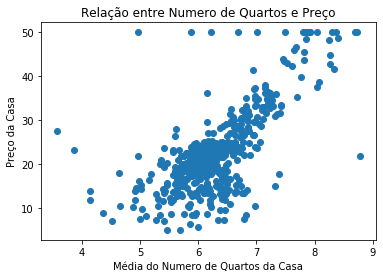

In [30]:
plt.scatter(df.RM, Y)
plt.xlabel('Média do Numero de Quartos da Casa')
plt.ylabel('Preço da Casa')
plt.title('Relação entre Numero de Quartos e Preço')
plt.show()

In [31]:
# criando o objeto de regressão linear
modelo = LinearRegression()

In [33]:
# treinando o modelo
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# coeficientes
print('Coeficiente: ', modelo.intercept_)
print('Numero do Coeficiente: ', len(modelo.coef_))

Coeficiente:  36.45948838509015
Numero do Coeficiente:  13


In [36]:
# prevemdo o preço da casa
modelo.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

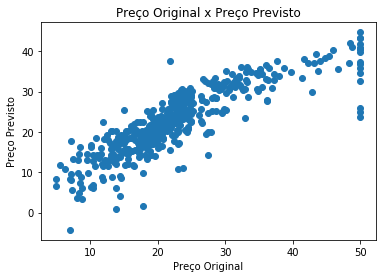

In [37]:
# comparando o preço original com o preço previsto
plt.scatter(df.PRICE, modelo.predict(X))
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Preço Original x Preço Previsto')
plt.show()

## Podemos ver que existem alguns erros na predição do preço das casas



In [40]:
# vamos calcular o MSE (Mean Squared Error)
mse = np.mean((df.PRICE - modelo.predict(X)) ** 2)
print('MSE: ', mse)

MSE:  21.89483118172922


In [42]:
# apliando regressão linear para apenas uma variavel e calculando o MSE
modelo = LinearRegression()
modelo.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - modelo.predict(X[['PTRATIO']])) ** 2)
print('MSE: ', mse2)

MSE:  62.65220001376927


## O MSE aumentou, indicando que uma unica caracterista não é um bom predictor para o preço da casa

# Dividindo de Forma MANUAL os Dados de Treino x Teste

In [46]:
# dividendo o X em dados de treino e teste
X_treino = X[ : -50]
X_teste = X[-50 : ]

# dividindo Y em dados de treino e teste
Y_treino = df.PRICE[ : -50]
Y_teste = df.PRICE[-50 : ]

# imprime o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


# Dividindo os dados de treino x teste usando o scikit-learn de forma AUTOMATICA, que é a forma mais correta

In [47]:
# importando o modelo
from sklearn.model_selection import train_test_split

In [48]:
# dividindo X e Y em dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [49]:
# imprime o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


In [50]:
# construindo o modelo da regressão
modelo = LinearRegression()

In [51]:
# treinando o modelo
modelo.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Definindo os dados de Treino e Teste
pred_treino = modelo.predict(X_treino)
pred_teste = modelo.predict(X_teste)

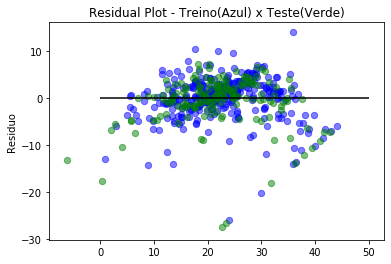

In [55]:
# comparando preços originais x preço previstos
plt.scatter(modelo.predict(X_treino), modelo.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(modelo.predict(X_teste), modelo.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel('Residuo')
plt.title('Residual Plot - Treino(Azul) x Teste(Verde)')
plt.show()

In [56]:
# Coeficientes
print('Coeficiente: ', modelo.coef_)

# MSE (mean square error)
print('MSE: ', np.mean((modelo.predict(X_teste) - Y_teste) ** 2))

# Score de variação: 1 - Representa a predição perfeita (100% de acuracia)
print('Score de variação ', modelo.score(X_teste, Y_teste))

Coeficiente:  [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]
MSE:  28.530458765974604
Score de variação  0.6956551656111607
